# Simple Classifiers, Continuous Bag Of Words

## Import Modules

In [1]:
import pandas as pd

from nltk.tokenize import word_tokenize 
import gensim 
from gensim.models import Word2Vec

import keras

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn import svm

from sklearn.decomposition import PCA
from matplotlib import pyplot

Using TensorFlow backend.


## Import Data

In [2]:
path = '../data/'
file = path + 'climate_change_tweets_sample-2020-05-16-17-57.csv'

file_o = open(file,encoding='utf8')

data = pd.read_csv(file)

file_o.close

<function TextIOWrapper.close()>

A little bit of cleaning...

In [3]:
data= data.query("username != '54'")
data= data.query("username != '318'")
data= data.query("username != '96'")

A little bit of shuffling...

In [4]:
data = data.sample(frac=1)

## Get Tweets and Labels

In [5]:
tweets = data['text'].values

labels = data['label'].values

Train and Test set :

In [6]:
test_size = 0.4
tweets_train, tweets_test, labels_train, labels_test = train_test_split(tweets,labels,test_size=test_size)

## Transform tweets into a CBOW

### Define the tokenizer and train the CBOW with gensim

In [7]:
word_dim = 10

tokens = []
test_size=0.4

for t in tweets:
    tokens.append(word_tokenize(t))   

tok_train, tok_test, labels_train, labels_test = train_test_split(tokens,labels,test_size=test_size)

model_CBOW = gensim.models.Word2Vec(tokens, min_count = 1, size = word_dim, window=5, workers=4)

### Graphic representation of words

C:\Users\Mathi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


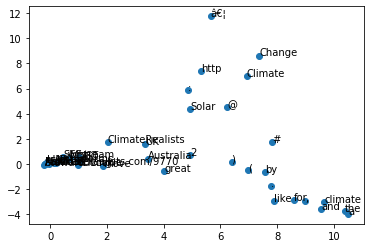

In [8]:
X = model_CBOW[model_CBOW.wv.vocab]
pca = PCA(n_components=2)
pca_results = pca.fit_transform(X)

pyplot.scatter(pca_results[:40, 0], pca_results[:40, 1])

words = list(model_CBOW.wv.vocab)

for i, word in enumerate(words[:40]):
    pyplot.annotate(word[:], xy=(pca_results[i, 0], pca_results[i, 1]))
pyplot.show()

### Embed the tweets

In [9]:
train_embed = []
for t in tok_train:
    train_embed.append(model_CBOW.wv[t])

test_embed = []
for t in tok_test:
    test_embed.append(model_CBOW.wv[t])

max_words_in_tweets = 100

train_embed = keras.preprocessing.sequence.pad_sequences(train_embed, maxlen = max_words_in_tweets,padding='post')
test_embed = keras.preprocessing.sequence.pad_sequences(test_embed, maxlen = max_words_in_tweets,padding='post')

In [10]:
train_embed = train_embed.reshape(-1,word_dim*max_words_in_tweets)
print(train_embed.shape)
test_embed = test_embed.reshape(-1,word_dim*max_words_in_tweets)
print(test_embed.shape)

(10803, 1000)
(7203, 1000)


## Classifiers

### Naive Bayes Multinomial

In our case, binomial.

classifier = MultinomialNB().fit(train_embed, labels_train)

predicted = classifier.predict(test_embed)

acc=0
for i in range(len(predicted)):
    if predicted[i]==labels_test[i]:
        acc = acc + 1

acc=acc/len(predicted)

print('Accuracy on test :', round(acc,4))

### Decision Tree Classifier

In [11]:
classifier = tree.DecisionTreeClassifier().fit(train_embed, labels_train)

In [12]:
predicted = classifier.predict(test_embed)

acc=0
for i in range(len(predicted)):
    if predicted[i]==labels_test[i]:
        acc = acc + 1

acc=acc/len(predicted)

print('Accuracy on test :', round(acc,4))

Accuracy on test : 0.7583


### Support Vector Machines

In [13]:
classifier = svm.SVC(verbose=True,cache_size=600).fit(train_embed, labels_train)

[LibSVM]

In [14]:
predicted = classifier.predict(test_embed)

acc=0
for i in range(len(predicted)):
    if predicted[i]==labels_test[i]:
        acc = acc + 1

acc=acc/len(predicted)

print('Accuracy on test :', round(acc,4))

Accuracy on test : 0.8685


### Multilayer Perceptron (Simplest Neural Network)

In [15]:
classifier = MLPClassifier().fit(train_embed, labels_train)

In [16]:
predicted = classifier.predict(test_embed)

acc=0
for i in range(len(predicted)):
    if predicted[i]==labels_test[i]:
        acc = acc + 1

acc=acc/len(predicted)

print('Accuracy on test :', round(acc,4))

Accuracy on test : 0.8658
